## Week 7 - Neural Networks 


In this tutorial, we shall install tensorflow and build deep learning model to predict hand-written digits from the mnist dataset. More about the dataset can be found <a href="https://www.kaggle.com/c/digit-recognizer">here</a>.

#### Keras Installation 

To get started with building deep learning models, install tensorflow: `conda install tensorflow`. Since keras is fully integrated with tensorflow, keras comes with tensorflow by default.

#### Import Packages

In [1]:
import numpy as np
import pandas as pd 
from time import time
from tensorflow import keras
from random import randint
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

from tensorflow.keras.datasets import mnist 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.models import Sequential

import warnings
warnings.filterwarnings('ignore')

In [2]:
# to get reproducible results
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(1)

#### Load Dataset

In [3]:
#setup train-test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

Each image is of 28 height and 28 width in pixels


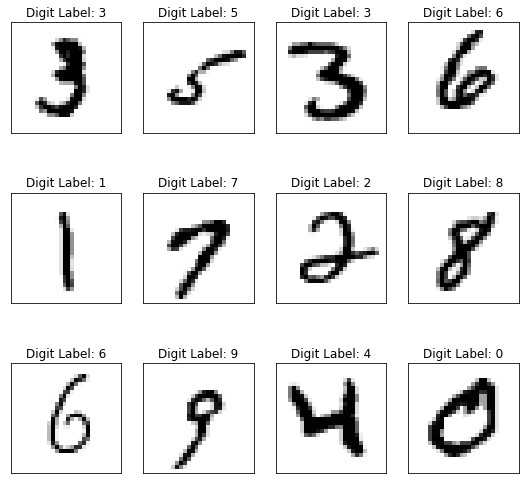

In [4]:
#visually inspect the data 

h, w = X_train[0].shape[0], X_train[0].shape[1]

# Reusing the functions that we previously used for face-recognition 
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of digits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray_r)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def get_title(y, i):
    label = y[i]
    return('Digit Label: %s' % label)

titles = [get_title(y_train, i) for i in range(10,25)]
print("Each image is of %s height and %s width in pixels" % (h, w))
plot_gallery(X_train[10:25], titles, h, w)
plt.show()

#### Preprocess Data

In [5]:
# Count overall pixels in each image 
image_size = h*w

# Transform from matrix to vector, cast and normalize for training set
X_train = X_train.reshape(X_train.shape[0], image_size)
X_train = X_train.astype('float32')
X_train /= 255 

# Transform from matrix to vector, cast and normalize for test set
X_test = X_test.reshape(X_test.shape[0], image_size)
X_test = X_test.astype('float32')
X_test /= 255

### Neural network with scikit-learn

In [6]:
mlp = MLPClassifier(hidden_layer_sizes=(50, ), max_iter=10, alpha=1e-4, solver='sgd', 
                    verbose=1, random_state=1, learning_rate_init=.1)
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.32009830
Iteration 2, loss = 0.15345341
Iteration 3, loss = 0.11544316
Iteration 4, loss = 0.09305058
Iteration 5, loss = 0.07870843
Iteration 6, loss = 0.07093436
Iteration 7, loss = 0.06236826
Iteration 8, loss = 0.05530422
Iteration 9, loss = 0.04932042
Iteration 10, loss = 0.04607797


MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=10,
              random_state=1, solver='sgd', verbose=1)

In [7]:
mlp.score(X_test, y_test) # Test Accuracy

0.9711

### Neural network with keras

In [8]:
# Converting classes to binary class vectors - similar to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
y_test[:2]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

#### Define network 

In [9]:
model = Sequential([Dense(units = 16, input_shape=(image_size,), activation='sigmoid'), # first hidden layer 
                    Dense(units = 32, activation='sigmoid'), # second hidden layer
                    Dense(units=10, activation='softmax')]) # output layer with 10 units as there are 10 digits to identify 
                                                            # softmax gives the probability for each output class 

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 13,434
Trainable params: 13,434
Non-trainable params: 0
_________________________________________________________________


#### Compile network

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

#### Fit network

In [12]:
#Train the model to learn weights 

# validation set is kept aside before the epoch begins and within each epoch, 
# the same validation set is used to evaluate the model performance. 
# Shuffle is true by default and is done only for the training set.
model.fit(X_train, y_train, epochs = 15, validation_split=0.1, shuffle=True, verbose=1)

Epoch 1/15
1688/1688 [==============================] - 2s 1ms/step - loss: 2.2719 - accuracy: 0.1799 - val_loss: 2.2255 - val_accuracy: 0.2530
Epoch 2/15
1688/1688 [==============================] - 2s 989us/step - loss: 2.1429 - accuracy: 0.4174 - val_loss: 2.0102 - val_accuracy: 0.5357
Epoch 3/15
1688/1688 [==============================] - 2s 992us/step - loss: 1.8434 - accuracy: 0.5563 - val_loss: 1.6224 - val_accuracy: 0.6205
Epoch 4/15
1688/1688 [==============================] - 2s 1ms/step - loss: 1.4754 - accuracy: 0.6571 - val_loss: 1.2741 - val_accuracy: 0.7095
Epoch 5/15
1688/1688 [==============================] - 2s 996us/step - loss: 1.1936 - accuracy: 0.7186 - val_loss: 1.0276 - val_accuracy: 0.7823
Epoch 6/15
1688/1688 [==============================] - 2s 969us/step - loss: 0.9916 - accuracy: 0.7657 - val_loss: 0.8482 - val_accuracy: 0.8187
Epoch 7/15
1688/1688 [==============================] - 2s 1ms/step - loss: 0.8408 - accuracy: 0.8018 - val_loss: 0.7113 - val_a

#### Make predictions

In [13]:
# predicts the probabilities of each class 
predictions = model.predict(X_test, verbose=0)
predictions[:2]

array([[1.1245670e-02, 8.1418584e-05, 7.3533016e-04, 6.5590939e-03,
        5.5623455e-05, 7.4086915e-04, 6.9264029e-06, 9.6205467e-01,
        6.8934704e-04, 1.7830992e-02],
       [3.9842837e-03, 3.2950330e-03, 8.6650193e-01, 6.3645259e-02,
        3.2952117e-05, 1.5642900e-02, 3.9158098e-02, 3.3743498e-05,
        7.6858681e-03, 1.9785446e-05]], dtype=float32)

In [14]:
# Class with maximum probability is considered as the predicted class. 
predictions_classes = np.argmax(predictions, axis=-1)
predictions_classes[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=int64)

In [15]:
accuracy_score(np.argmax(y_test, axis=-1), predictions_classes)

0.8957

#### Confusion matrix

In [16]:
%matplotlib inline 
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt 

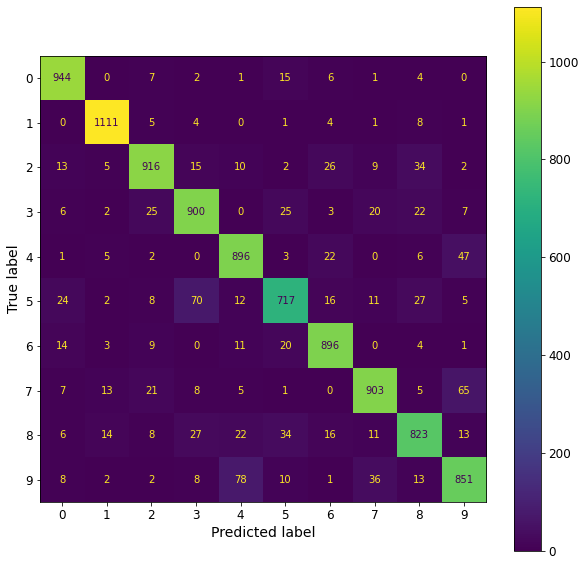

In [17]:
with plt.rc_context({'xtick.labelsize':12, 'ytick.labelsize':12, 'axes.labelsize':14, 'figure.figsize': (10,10)}):
    ConfusionMatrixDisplay.from_predictions(np.argmax(y_test, axis=1), predictions_classes)